<a href="https://colab.research.google.com/github/jurados/NotesPytorch/blob/main/%5B2%5D%20Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

# Neural Networks

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

*x_train* y *y_train* conforman el conjunto de entrenamiento, mientras que *x_test* y *y_test* contienen los datos de prueba.

3


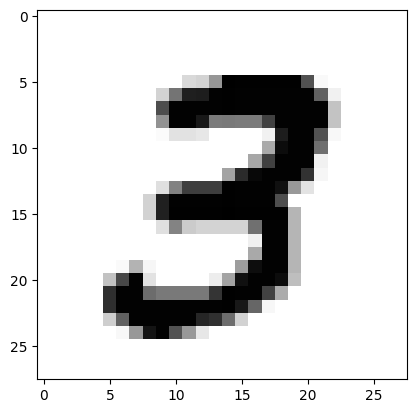

In [ ]:
plt.imshow(x_train[7], cmap=plt.cm.binary)
print(y_train[7])

In [ ]:
print(x_train.ndim)
print(x_train.shape)

3
(60000, 28, 28)


*x_train* es un tensor 3D de enteros de 8bits. Se trata de un vector de 60000 matrices 2D de 28 $\times$ 28.

## Preprocesado de Datos de Entrada en una Red Neuronal

Algunos de los preprocesamientos más habituales en Deep Learning son vectorización, normalización o extracción de características.

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

Codificación _one-hot_, consiste en transformar las etiquetas en un vector de tantos ceros como números de etiquetas distintas, y que contiene el valor de 1 en el índice, que corresponde al valor de la etiqueta.

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
print(y_test[0])
print(y_train[0])
print(y_train.shape)
print(x_test.shape)

7
5
(60000,)
(10000, 784)


In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)

print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print(y_train.shape)

(60000, 10)


In [ ]:
print(y_test.shape)

(10000, 10)


## Definición del Modelo

La estructura de datos principal en Keras es la clase _Sequential_ que permite la cración de una red neuronal básica.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=10,activation='sigmoid', input_shape=(784, )))
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


El método _summary()_ muestra todas las capas del modelo, lo que incluye el nombre de cada capa, su forma de salida y su número de parámetros entrenables y no entrenables.

## Configuración del Proceso de Aprendizaje

Una vez se tenga el modelo definido, se debe configurar cómo será su proceso de aprendizaje con el método _compile()_, con el que podemos especificar algunas propiedades a través de argumentos del método.

El primer argumento es la función de coste (_loss function_), que usaremos para evular el grado de error entre las salidas calculadas y las salidas deseadas de los datos de entreamiento. Por otro lado, se especifica un optimizador de optimización que permite a la red neural calcular los pesos de los parámetros durante el entrenamiento a partir de los datos de entrada y de la función de coste definida.

Finalmente, se debe indicar la métrica que se usara para monitorizar el proceso (y prueba) de nuestra red neural. Se tendrá solo en cuenta la precisión (fracción de imágenes que son correctamente clasificadas)

In [ ]:
model.compile(loss='categorical_crossentropy', # función de coste
              optimizer='sgd',                 # stocastic gradient descent
              metrics=['accuracy'])

## Entrenamiento del Modelo

Se puede entrenar el modelo o ajustar el modelo a los datos de entrenmaineto de que disponemos invocando al método _fit()_ del modelo

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.9659 - accuracy: 0.4900
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3809 - accuracy: 0.6873
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0331 - accuracy: 0.7672
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8296 - accuracy: 0.8123
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6997 - accuracy: 0.8438


Con _epochs_ se está indicando en número de veces que usaremos todos los datos en el proceso de aprendizaje.

En cada iteración de este algoritmo, este coge datos de entrenamiento de *x_train*, los pasa a través de la red neuronal (con los valores que en aquel momento tengan sus parámetros), compara el resultado obtenido con el esperado (indicado en *y_train*) y calcula la _loss_ con la función de conste para guiar el proceso de ajuste de los parámetros del modelo.

Este método retorn un objeto _History_, dentro del cuál a través de _History.history_ da el registro de los valores de _loss_ para losd atos de entrenamiento y resto de métricas en sucesivas _epochs_, así como tras métricas para los datos de validación si se han especificado.

## Evaluación del Modelo

Ya podemos evaluar la red neuronal a través del método _evaluate()_

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6305 - accuracy: 0.8650


In [ ]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8650000095367432


La precisión (_accuracy_) no está indicando que el modelo que hemos creado aplicado sobre los datos que nunca ha visto anterirmente clasifica el $90\%$ de ellos correctamente.

La Matriz de Confusión (_confusion matrix_), una tabla con filas y columnas que contabilizan las predicciones en comparación con los valores reales.

![](https://www.researchgate.net/profile/Sebastian-Bittrich/publication/330174519/figure/fig1/AS:711883078258689@1546737560677/Confusion-matrix-Exemplified-CM-with-the-formulas-of-precision-PR-recall-RE.png)

- Precisión: Qué tan acertado es el modelo con los datos nuevos.
- _Recall_: Cómo de bien el modelo evita los falsos negativos.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 3ms/step


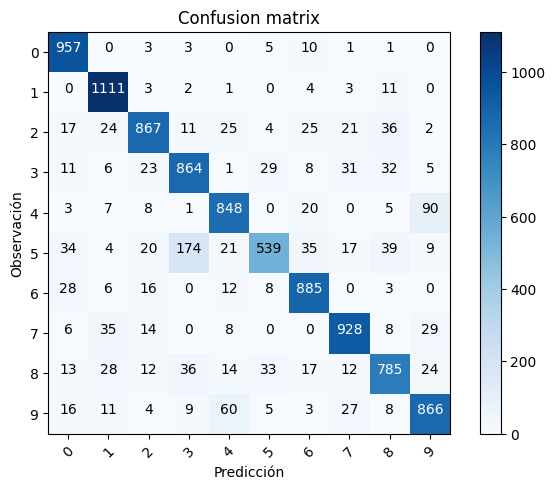

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))


## Generación de Predicciones

La idea final es usar predicciones sobre qué dígitos representa nuevas imágenes. Para ellos usamos el método _predict()_ de un modelo que haya sido previamente entrenado.

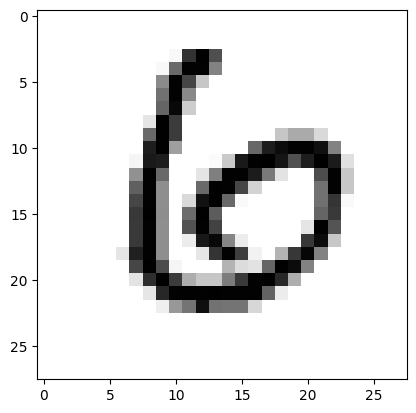

In [ ]:
  x_test_new = x_test
  x_test = x_test.reshape(10000, 28,28)
  plt.imshow(x_test[11], cmap = plt.cm.binary)

Comprobamos que el método _predict()_ del modelo predigo correctamente el valor

In [ ]:
predictions = model.predict(x_test_new)

313/313 [==============================] - 1s 3ms/step


Para saber a qué clase le da más probabilidad de pertenencia mediante la función _argmax_ de Numpy, que retorna el índice de la posición que contiene el valor más alto de la función. En concreto, para el elemento 11.

In [ ]:
np.argmax(predictions[11])

6

In [ ]:
print(predictions[11])

[0.08895355 0.01378015 0.24672666 0.01848639 0.07969311 0.06794547
 0.3856739  0.00412846 0.07082793 0.02378429]


In [ ]:
np.sum(predictions[11])

0.9999999

## Todos los Pasos


In [ ]:
# Preparar los datos

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Cargar los datos

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

In [ ]:
class_names = ['T-shirt/top','Trouser','Fullover','Dress',
               'Coat','Sandal','Shirt','Sneker','Bag',
               'Ankle boot']

In [ ]:
# Normalizar los datos de 0 a 1
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')


train_images = train_images / 255.
test_images = test_images / 255.

In [ ]:
print("train_images.shape:", train_images.shape)
print("len(train_labels):",len(train_labels))

print("test_images.shape:", test_images.shape)
print("len(test_labels):",len(test_labels))

train_images.shape: (60000, 28, 28)
len(train_labels): 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

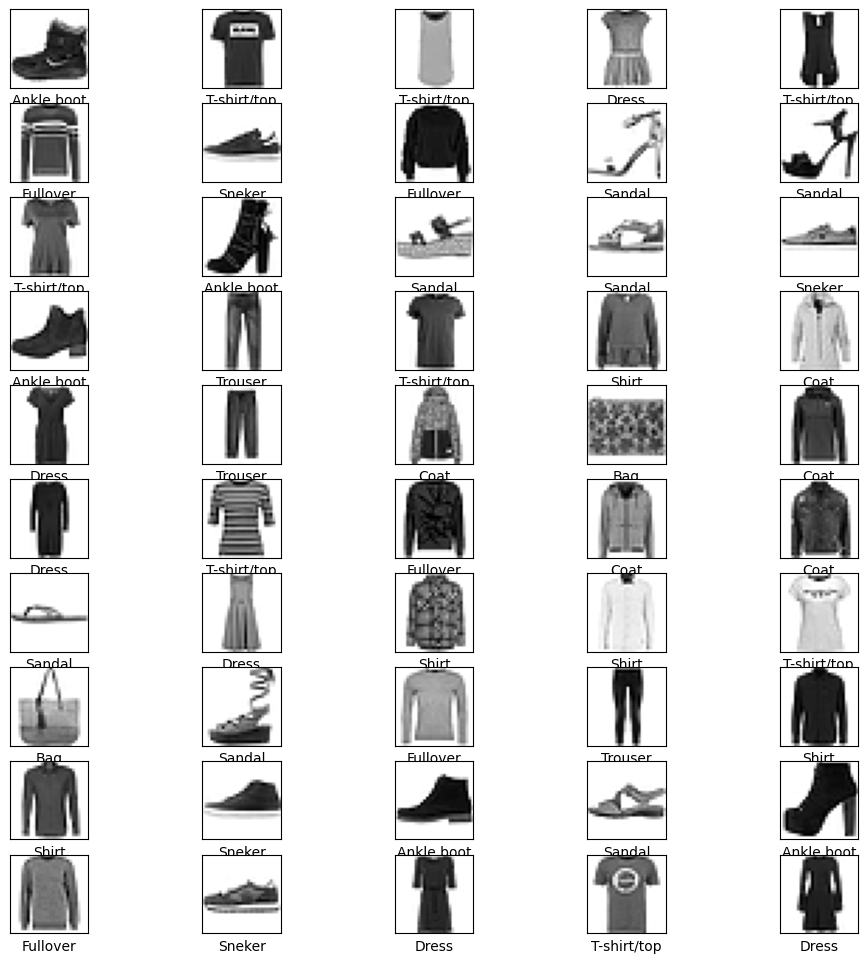

In [ ]:
plt.figure(figsize=(12,12))
for i in range(50):
  #plt.subplot(nrows=10,ncols=5,index=i+1)
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Se usa la funcion _Flatten()_ para convertir las muestras de entrada de $28 \times 28$ a un vector de $784$ números (concatenando fila a fila).

In [ ]:
# Definir el modelo

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=10, activation = 'sigmoid'))
model.add(Dense(units=10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7081 - accuracy: 0.5335
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1949 - accuracy: 0.6503
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9757 - accuracy: 0.6825
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8568 - accuracy: 0.7017
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7840 - accuracy: 0.7166


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.7699 - accuracy: 0.7176


In [ ]:
print('Test Accuracy: ', test_acc)

Test Accuracy:  0.7175999879837036


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 3s 9ms/step


In [ ]:
predictions[5]

array([3.1495132e-02, 8.7332511e-01, 1.0177797e-02, 3.7683092e-02,
       1.0353589e-02, 6.3002123e-03, 1.2060026e-02, 1.6135219e-02,
       4.0591334e-04, 2.0638509e-03], dtype=float32)

In [ ]:
np.argmax(predictions[5])

1

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

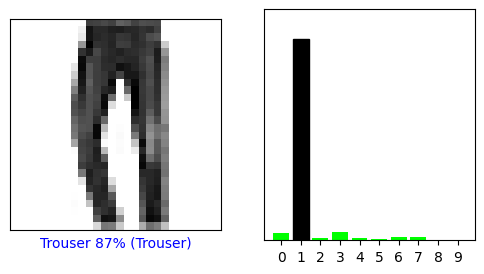

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

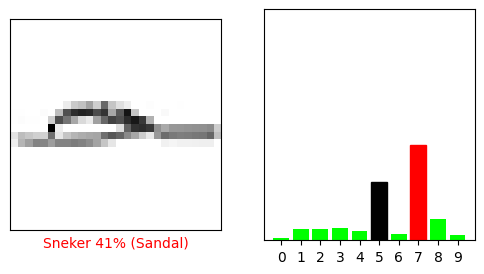

In [ ]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

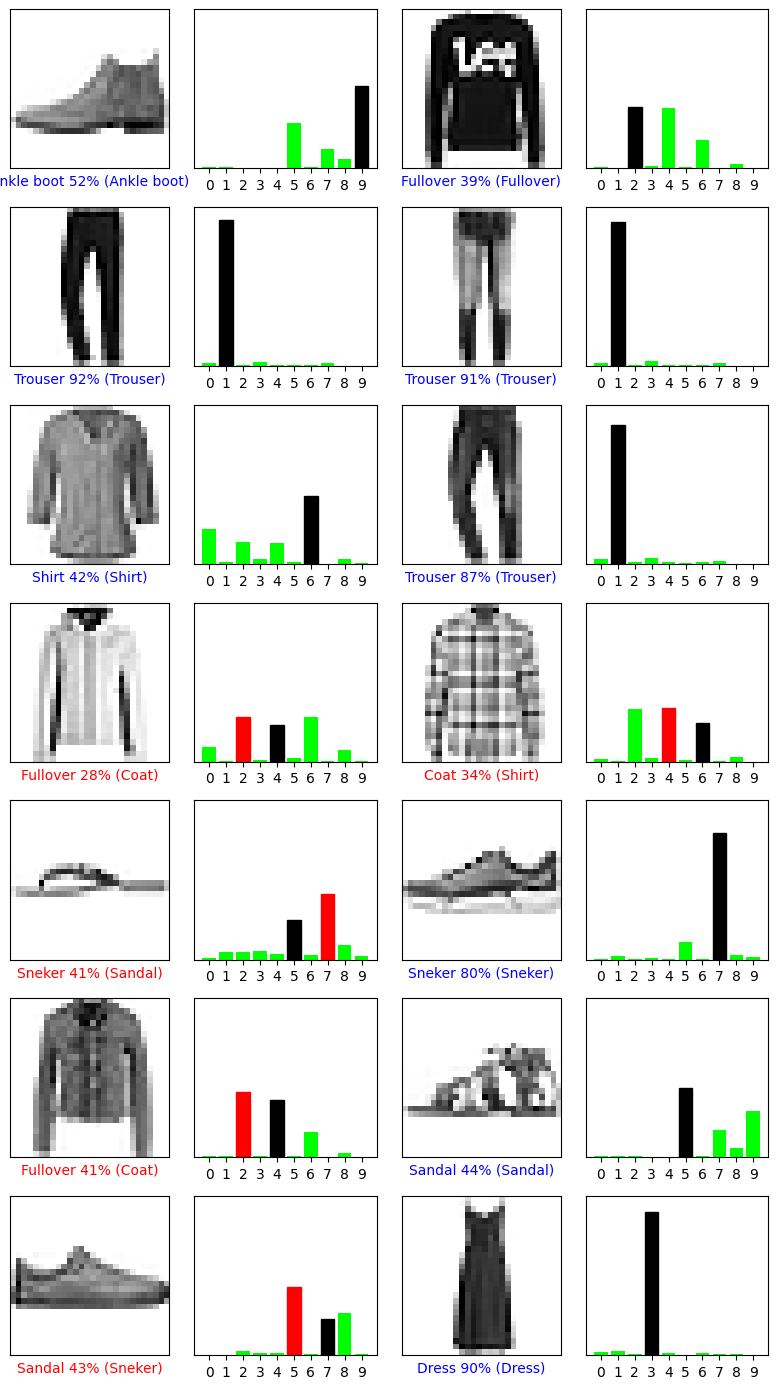

In [ ]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [ ]:
# Mejorar el modelo

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=10,activation='sigmoid'))
model.add(Dense(units=10,activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0598 - accuracy: 0.6849
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6119 - accuracy: 0.7930
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5021 - accuracy: 0.8296
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4520 - accuracy: 0.8407
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4603 - accuracy: 0.8366

Test accuracy: 0.8366000056266785
